In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'



<h2>Define Hyper-parameters</h2>

In [2]:
# Learning rate
lr = 0.01

# Number of training steps
num_steps = 5

# Network Parameters
n_hidden = 2 # number of nodes in the hidden layer
num_inputs = 2
num_classes = 1

<h2>Define your input data and expected labels</h2>

In [24]:
# Define input data
x = np.array([[0,0], [0,1], [1,0], [1,1]])
x_t = np.array([[0,1], [0,0], [1,1], [1,0]])
# Define ouput data
y = np.array([0,1,1,0])
y = np.reshape(y, [4,1])

y_t = np.array([1,0,0,1])
y_t = np.reshape(y_t, [4,1])

<h2>Define placeholder and Variables</h2>

In [25]:
tf.reset_default_graph()

# Define placeholder nodes
X = tf.placeholder(tf.float32, shape=[4,2],name='X')
Y = tf.placeholder(tf.float32, shape=[4,1],name='Y')

# Define weights
W = tf.Variable(tf.random_normal([num_inputs, n_hidden]),tf.float32,name='W')
Wout = tf.Variable(tf.random_normal([n_hidden, num_classes]),tf.float32,name='Wout')

# Define bias
b = tf.Variable(tf.zeros(shape=[n_hidden]),tf.float32,name='b')
bout = tf.Variable(tf.zeros(shape=[num_classes]),tf.float32,name='bout')


<h2>Define the cost function</h2>

In [26]:
# Define the neural net model
layer = tf.add(tf.matmul(X, W), b)
out = tf.add(tf.matmul(layer, Wout), bout)

# Predicted labels
logits = tf.sigmoid(out)

# Define loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y), name='loss')
loss = -tf.reduce_sum(y*tf.log(logits)+(1-Y)*tf.log(1-logits),axis = 1)

# Define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

# Initialize the variables
init = tf.global_variables_initializer()

# Compare the predicted labels with true labels
#correct_pred = tf.equal(tf.argmax(logits,1), tf.argmax(Y,1))
correct_pred = tf.equal(tf.cast(logits>0, tf.float32), Y)

# Compute the accuracy by taking the average
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32),name='accuracy')



<h2>Define the neural network</h2>

In [27]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(num_steps):
        # Fetch batch
        #batch_x, batch_y = x,y
        
        # Run Optimization
        sess.run(train_op, feed_dict={X:x, Y:y})
        
        if i % 1 == 0:
            acc = sess.run(accuracy, feed_dict={X:x, Y:y})
            l = sess.run(loss, feed_dict={X:x, Y:y})
            print("step " + str(i) + ", Accuracy = {:.3f}".format(acc))
    W = np.squeeze(sess.run(Wout))
    b = np.squeeze(sess.run(bout))            
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X:x_t, Y:y_t}))

step 0, Accuracy = 0.500
step 1, Accuracy = 0.500
step 2, Accuracy = 0.500
step 3, Accuracy = 0.500
step 4, Accuracy = 0.500
('Testing Accuracy:', 0.5)


In [28]:
print(W)
print(b)
print(x)

[ 0.8846463 -0.6495183]
-0.020959366
[[0 0]
 [0 1]
 [1 0]
 [1 1]]


<h2>Plot</h2>

In [29]:
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y = 1 / W[1] * (-W[0] * plot_x - b)

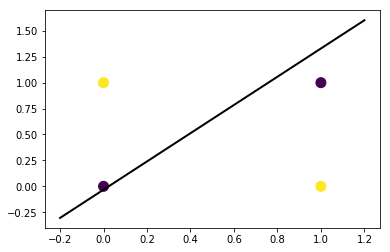

In [30]:
plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
#plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()